In [1]:
import os
os.chdir("../../../")
print(os.getcwd())

d:\PhD_Projects\Mori-Zwanzig-Autoencoder


In [2]:
import torch, pickle, os
from torch.utils.data import Dataset, DataLoader
from src.PreProc_Data.DataProc import StackedSequenceDataset
import numpy as np
from src.Eval_MZA import Eval_MZA
import matplotlib.pyplot as plt
import pandas as pd
from Data.KS.KS_order import KS


In [3]:
torch.cuda.empty_cache()


exp_dir   = "G:/PhD_Imperial/PhD_Projects/MZA_Cluster_Models/KS/Latest_Trained/Exp6.1.5_L36_KS_testlargedata_nodropout_seqlen"


# pickle.load(open("Trained_Models/Cluster_Models/Exp4.2.4_Transient_2DCyl_MULTISTEP_numobstest_with_seqmodel_switch/sl33_nhu40_numobs3_bs16_lr5e-5_ph10/args"))
models = []


exp_name_list = [
                 "sl9_nhu100_numobs16_bs512_lr5e-5_ph20_sd256",\
                 "sl17_nhu100_numobs16_bs512_lr5e-5_ph20_sd256",\
                 "sl33_nhu100_numobs16_bs512_lr5e-5_ph20_sd256",\
                 "sl49_nhu100_numobs16_bs512_lr5e-5_ph20_sd256",\
                 "sl65_nhu100_numobs16_bs512_lr5e-5_ph20_sd256"
                #  "sl129_nhu100_numobs20_bs512_lr5e-5_ph20_2",\
                #  "sl65_nhu40_numobs8_bs512_lr5e-5_ph20_2",\
                #  "sl129_nhu40_numobs8_bs512_lr5e-5_ph20_2"
                ]

# exp_name_list = [
#                  "sl9_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl17_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl25_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl33_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl49_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl65_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl129_nhu40_numobs6_bs512_lr5e-5_ph20",\
#                  "sl257_nhu40_numobs6_bs512_lr5e-5_ph20"
#                  ]

for exp_name in exp_name_list:#os.listdir(exp_dir):
    if exp_name != "results" and exp_name != ".DS_Store":
        print(exp_name)
        models.append(Eval_MZA(exp_dir, exp_name))
models
# eval_mza = Eval_MZA(exp_dir, exp_name)

lt = 50

sl9_nhu100_numobs16_bs512_lr5e-5_ph20_sd256
########## Imp Info ##########
System:  KS
Using Non-Linear Autoencoder
sl17_nhu100_numobs16_bs512_lr5e-5_ph20_sd256
########## Imp Info ##########
System:  KS
Using Non-Linear Autoencoder
sl33_nhu100_numobs16_bs512_lr5e-5_ph20_sd256
########## Imp Info ##########
System:  KS
Using Non-Linear Autoencoder
sl49_nhu100_numobs16_bs512_lr5e-5_ph20_sd256
########## Imp Info ##########
System:  KS
Using Non-Linear Autoencoder
sl65_nhu100_numobs16_bs512_lr5e-5_ph20_sd256
########## Imp Info ##########
System:  KS
Using Non-Linear Autoencoder


In [4]:
print("Deactivate Model: ", models[0].deactivate_seqmodel)

Deactivate Model:  False


In [5]:
print("Pred horizon: ", models[0].pred_horizon)

Pred horizon:  20


Epoch with Minimum train_error:  8905


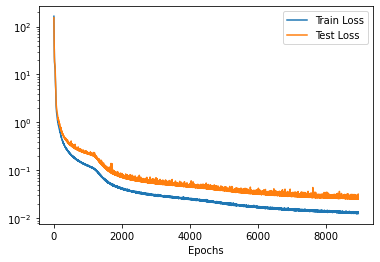

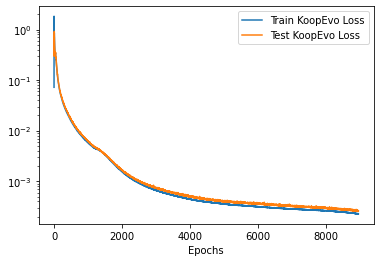

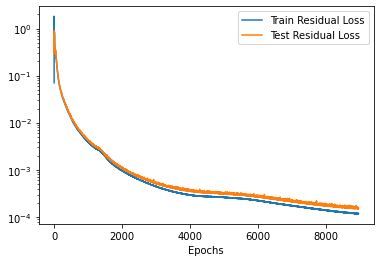

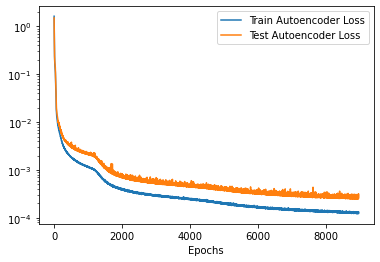

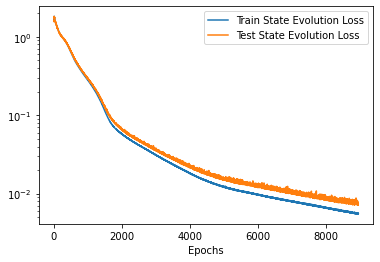

In [33]:
#plot learning curves
models[2].plot_learning_curves()

In [7]:
#for autoencoder_seq loading the strcuture separately for clarity and security
# for i in range(0,len(models)):
#     models[i].model.autoencoder = Autoencoder_seq(input_size = models[i].statedim, latent_size = models[i].num_obs, linear_ae = models[i].linear_autoencoder).to(models[0].device)

for i in range(0,len(models)):
    epoch_num = 7999
    models[i].load_weights(epoch_num, True)

In [8]:
# for i in range(0,len(models)):

ph0 = models[0].pred_horizon 
models[0].pred_horizon = 1

In [9]:

#One Step Prediction
model_num = 0
# models[model_num].data_dir = models[-2].data_dir
models[model_num].load_and_preproc_data()
models[model_num].create_dataset(mode = "Test")
dataset = models[model_num].test_dataset
num_trajs = models[model_num].test_num_trajs

# eval_mza.train_size = 0.9
for i in range(1):#len(models)):
    i=model_num
    # del eval_mza.lp_data 
    # torch.cuda.empty_cache()
    # del eval_mza.train_dataset
    # del eval_mza.train_dataloader
    if not models[i].deactivate_seqmodel:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE, koop_out, seqmodel_out = models[i].predict_onestep(dataset, num_trajs)
    else:
        x_nn_hat, Phi_nn_hat, x_nn, Phi_nn, State_MSE = models[i].predict_onestep(dataset, num_trajs)
    print(x_nn_hat.shape, Phi_nn_hat.shape, Phi_nn.shape)

    #Plotting one step prediction
    x_nn_hat.shape

models[0].pred_horizon = ph0


Data Shape:  (1, 65000, 256)
Not normalizing Input
Test_Shape:  (1, 6500, 256)
Time:  0.2747039794921875


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


torch.Size([1, 6499, 16]) torch.Size([1, 6499, 256]) torch.Size([1, 6499, 256])


In [10]:
Phi = models[0].test_data

Text(0, 0.5, 'MSE')

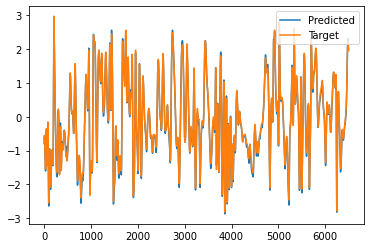

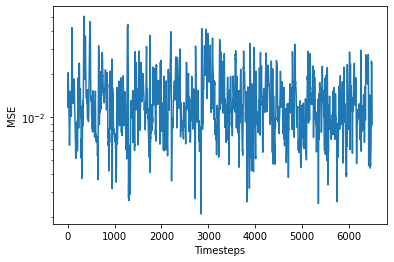

In [11]:
for i in range (1):
    plt.figure()
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,0], label = "Predicted")
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], label = "Target")
    plt.legend()

plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")

Multi Step

In [12]:
for i in range(len(models)):
    models[i].deactivate_seqmodel = False

In [79]:
#multistep prediction
timesteps = 1000
initial_step = 1000
initial_conditions = Phi_nn[:,initial_step,:].to(models[0].device)

x_ms_hat, xkoop_ms_hat, xseq_ms_hat = [], [], []
Phi_ms_hat = torch.zeros((len(models),1,timesteps+1,models[0].statedim)).to(models[0].device)
Phi_ms_koop = torch.zeros((len(models),1,timesteps,models[0].statedim)).to(models[0].device)

print("ic shape:", initial_conditions.shape)

for i in range(len(models)):
    x_hat_temp, Phi_ms_hat[i], Phi_ms_koop[i], xkoop_hat_temp, xseq_hat_temp = models[i].predict_multistep(initial_conditions, timesteps)
    x_ms_hat.append(x_hat_temp)
    xkoop_ms_hat.append(xkoop_hat_temp)
    xseq_ms_hat.append(xseq_hat_temp)
print(Phi_ms_hat.shape, Phi_ms_koop.shape)


ic shape: torch.Size([1, 256])


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


torch.Size([5, 1, 1001, 256]) torch.Size([5, 1, 1000, 256])


Text(0, 0.5, 'kinetic energy')

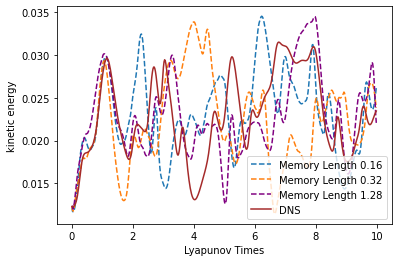

In [84]:
#kinetic energy of multistep rpediciton
def KS_kinetic_energy(Phi):
    L = 36
    k = 0.5*np.mean(Phi**2, axis = -1)/L
    return k

plt.figure()

timesteps_ke = 500
lt = 50
x = np.arange(timesteps_ke)/lt

for i in [0,1,4]:
    
    if i == 4:
        plt.plot(x, KS_kinetic_energy(Phi_ms_hat[i,0,0:timesteps_ke].detach().cpu().numpy()),"--",color = "Purple", label = f"Memory Length {(models[i].seq_len - 1)/lt}")
    else:
        plt.plot(x, KS_kinetic_energy(Phi_ms_hat[i,0,0:timesteps_ke].detach().cpu().numpy()),"--", label = f"Memory Length {(models[i].seq_len - 1)/lt}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.plot(x[:], KS_kinetic_energy(Phi[0,initial_step:timesteps_ke+initial_step]), label = "DNS",color = "brown")

plt.legend(loc='lower right')
plt.xlabel("Lyapunov Times")
plt.ylabel("kinetic energy")

In [39]:
plt.figure()

timesteps_ke = 250
lt = 50
x = np.arange(timesteps_ke)/lt

for i in [1]:
    
    plt.plot(x, Phi_ms_hat[i,0,0:timesteps_ke,400].detach().cpu().numpy(), label = f"Sequence Length {models[i].seq_len - 1}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.plot(x[:], Phi[0,initial_step:timesteps_ke+initial_step,400], label = "DNS",color = "brown")

plt.legend(loc='lower right')
plt.xlabel("Lyapunov Times")
plt.ylabel("kinetic energy")

IndexError: index 400 is out of bounds for dimension 3 with size 256

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Lyapunov Time Units')

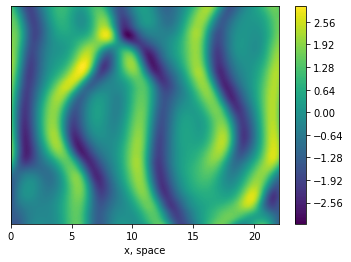

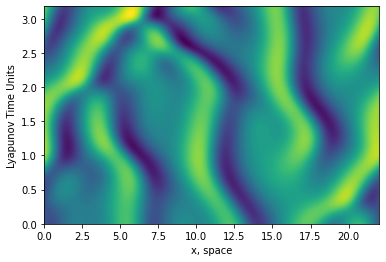

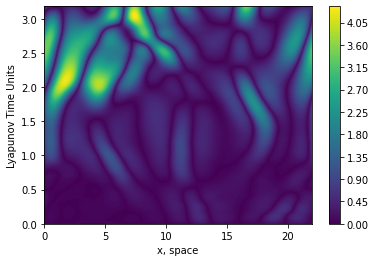

In [53]:
#plot snapshot

timesteps_contour = 160
contour_x = np.linspace(0,22,256)
contour_t = np.arange(timesteps_contour)/lt
contour_X, contour_T = np.meshgrid(contour_x, contour_t)

model_no = 0

plt.figure()
# plt.gca().set_aspect('equal')
plt.contourf(contour_X, contour_T, Phi_ms_hat[model_no,0,:timesteps_contour,:].detach().cpu().numpy(), levels = 200)
plt.colorbar()
plt.xlabel(r"x, space")
plt.yticks([])
# plt.ylabel(r"Lyapunov Time Units")

plt.figure()
# plt.gca().set_aspect('equal')
plt.contourf(contour_X, contour_T, Phi[0,initial_step:timesteps_contour+initial_step], levels = 200)
# plt.colorbar()
plt.xlabel(r"x, space")
plt.ylabel(r"Lyapunov Time Units")

plt.figure()
# plt.gca().set_aspect('equal')
vmin = 0  # Minimum value for color scale
vmax = 10000   # Maximum value for color scale

contour_error =  np.abs(Phi[0,initial_step:timesteps_contour+initial_step] - Phi_ms_hat[model_no,0,:timesteps_contour,:].detach().cpu().numpy())#/Phi[0,initial_step:timesteps_contour+initial_step])
clipped_ce = np.clip(contour_error, None, 10)
contour = plt.contourf(contour_X, contour_T, clipped_ce, levels = 200,cmap='viridis')
colorbar = plt.colorbar(contour)
plt.xlabel(r"x, space")
plt.ylabel(r"Lyapunov Time Units")
# Set the color bar limits
# colorbar.set_clim(vmin, vmax)

Text(0, 0.5, 'Probability Density')

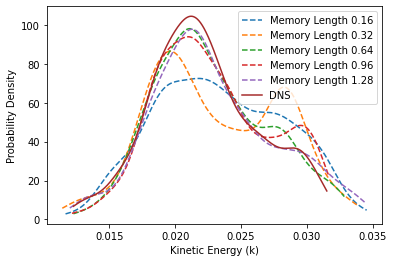

In [59]:
#pdf of kinteic energy

plt.figure()

for i in [0,1,2,3,4]:
    k, pdf = Eval_MZA.calc_pdf(KS_kinetic_energy(Phi_ms_hat[i,0,:].detach().cpu().numpy()))
    plt.plot(k,pdf , "--", label = f"Memory Length {round((models[i].seq_len - 1)/lt,2)}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
k, pdf = Eval_MZA.calc_pdf(KS_kinetic_energy(Phi[0,initial_step:timesteps+initial_step]))
plt.plot(k, pdf, label = "DNS",color = "brown")

plt.legend(loc='upper right')

plt.xlabel('Kinetic Energy (k)')
plt.ylabel('Probability Density')



[  0.           0.17453293   0.34906585   0.52359878   0.6981317
   0.87266463   1.04719755   1.22173048   1.3962634    1.57079633
   1.74532925   1.91986218   2.0943951    2.26892803   2.44346095
   2.61799388   2.7925268    2.96705973   3.14159265   3.31612558
   3.4906585    3.66519143   3.83972435   4.01425728   4.1887902
   4.36332313   4.53785606   4.71238898   4.88692191   5.06145483
   5.23598776   5.41052068   5.58505361   5.75958653   5.93411946
   6.10865238   6.28318531   6.45771823   6.63225116   6.80678408
   6.98131701   7.15584993   7.33038286   7.50491578   7.67944871
   7.85398163   8.02851456   8.20304748   8.37758041   8.55211333
   8.72664626   8.90117919   9.07571211   9.25024504   9.42477796
   9.59931089   9.77384381   9.94837674  10.12290966  10.29744259
  10.47197551  10.64650844  10.82104136  10.99557429  11.17010721
  11.34464014  11.51917306  11.69370599  11.86823891  12.04277184
  12.21730476  12.39183769  12.56637061  12.74090354  12.91543646
  13.0899693

Text(0, 0.5, 'kinetic energy')

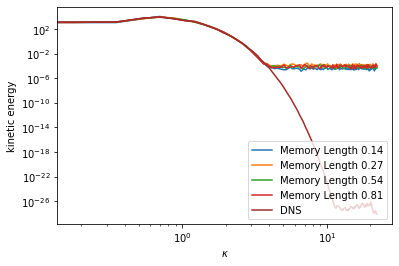

In [66]:
#energy spectrum
dt = 0.25
N  = 256
num_trajs = 1
max_n = int(8000/dt)
L = 36/(2*np.pi)#1/np.sqrt(0.085)
kse = KS(dt=dt, N=N, lambda2=1, L = L)

plt.figure()

timesteps_ke = 1000
lt = 59
x = np.arange(1000)/lt

Phi_ms_hat_fft = np.fft.rfft(Phi_ms_hat.detach().cpu().numpy())
k_fft = 0.5*np.mean(np.abs(Phi_ms_hat_fft)**2, axis = -2)
print(k_fft[0,0].shape)
for i in [0,1,2,3]:
    
    plt.loglog(kse.k[:-1], k_fft[i,0,:-1], label = f"Memory Length {round((models[i].seq_len - 1)/lt,2)}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
Phi_fft = np.fft.rfft(Phi[0,initial_step:timesteps+initial_step], axis = -1)
print(Phi_fft.shape)
k_fft = 0.5*np.mean(np.abs(Phi_fft)**2, axis = 0)
plt.loglog(kse.k[:-1], k_fft[:-1], label = "DNS",color = "brown")

plt.legend(loc='lower right')
plt.xlabel(r"$\kappa$")
plt.ylabel("kinetic energy")



Text(0, 0.5, '$\\mathcal{K}(x_{2})$')

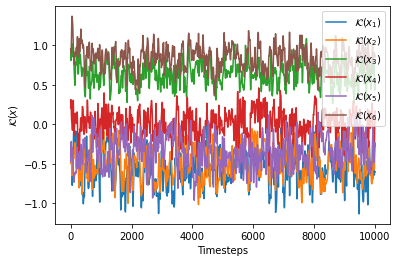

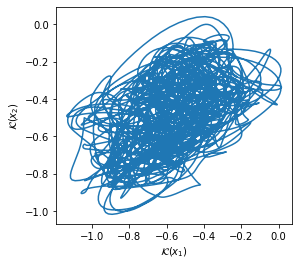

In [17]:
#plotting koopman mode evolution
plt.figure()
model_num = 0
for n in [0,1,2,3,4,5]:#range(models[model_num].num_obs):
    plt.plot(xkoop_ms_hat[model_num][0,:,n].cpu().numpy(), label = r"$\mathcal{K}$"+f"$(x_{n+1})$")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel(r"$\mathcal{K}(x)$")


plt.figure()
plt.gca().set_aspect('equal')
plt.plot(xkoop_ms_hat[model_num][0,:,0].cpu().numpy(), xkoop_ms_hat[model_num][0,:,1].cpu().numpy())

plt.xlabel(r"$\mathcal{K}(x_{1})$")
plt.ylabel(r"$\mathcal{K}(x_{2})$")

Text(0, 0.5, 'Observables $  L_{2} Norm$')

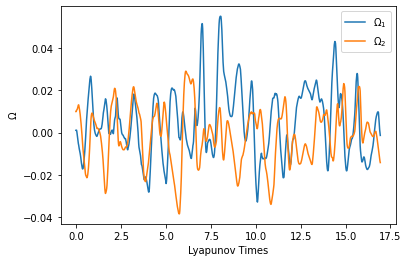

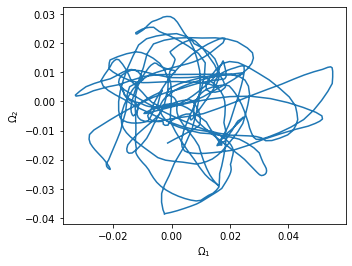

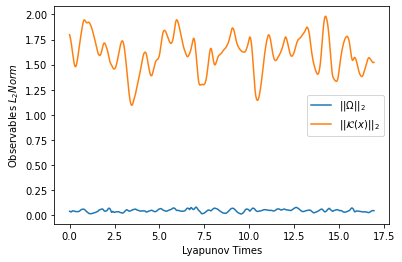

In [34]:
#plotting seqmodel mode evolution
plt.figure()
x = np.arange(timesteps)/lt

model_num = 0
tgt_xseq_ms_hat = xseq_ms_hat[model_num].cpu().numpy()
tgt_xkoop_ms_hat = xkoop_ms_hat[model_num].cpu().numpy()
for n in [0,1]:#range(models[model_num].num_obs):
    plt.plot(x, xseq_ms_hat[model_num][0,:,n].cpu().numpy(), label = r"$\Omega$"+f"$_{n+1}$")

plt.legend()
plt.xlabel("Lyapunov Times")
plt.ylabel(r"$\Omega$")

plt.figure()
plt.gca().set_aspect('equal')
plt.plot(xseq_ms_hat[model_num][0,:,0].cpu().numpy(), xseq_ms_hat[model_num][0,:,1].cpu().numpy())
plt.xlabel(f"$\Omega_{1}$")
plt.ylabel(f"$\Omega_{2}$")

plt.figure()
tgt_xseq_norm = np.linalg.norm(tgt_xseq_ms_hat, axis = -1)
tgt_xkoop_norm = np.linalg.norm(tgt_xkoop_ms_hat, axis = -1)


# plt.plot((tgt_xseq_norm/np.max(tgt_xseq_norm, axis = -1))[0,:], label = r"$||\Omega||_{2}$")
# plt.plot((tgt_xkoop_norm/np.max(tgt_xkoop_norm, axis = -1))[0,:], label = r"$||\mathcal{K}(x)||_{2}$")

plt.plot(x, (tgt_xseq_norm)[0,:], label = r"$||\Omega||_{2}$")
plt.plot(x, (tgt_xkoop_norm)[0,:], label = r"$||\mathcal{K}(x)||_{2}$")

plt.legend()
plt.xlabel("Lyapunov Times")
plt.ylabel("Observables " + r"$  L_{2} Norm$")

torch.Size([1, 6499, 256]) torch.Size([5, 1, 1001, 256])


Text(0, 0.5, 'MSE')

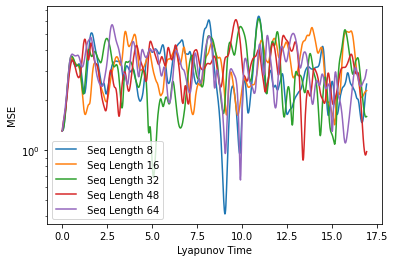

In [35]:
print(Phi_nn.shape, Phi_ms_hat.shape)
timesteps_mse = 1000
State_MSE_multistep = torch.zeros((len(models),timesteps_mse))

x = np.arange(timesteps_mse)/lt
plt.figure()
for i in [0,1,2,3,4]:#range(len(models)-3):
    State_MSE_multistep[i] = Eval_MZA.state_mse(Phi_nn[:,:timesteps_mse],Phi_ms_hat[i,:,:timesteps_mse]).detach().cpu()
    # if i!=len(models)-1:
    
    plt.semilogy(x, State_MSE_multistep[i].numpy(), label = f" Seq Length {models[i].seq_len - 1}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")

# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.legend()
plt.xlabel("Lyapunov Time")
plt.ylabel("MSE")
# np.save("koopman_numobs32.npy",Phi_hat.cpu().numpy())

In [ ]:
#calculating kinetic energy for multistep prediction
k_ms_pred = energy(U_ms_hat, V_ms_hat)
print(k_ms_pred.shape)
plt.figure()
for i in [0,1,2,3,4,5,6,7]:
    
    plt.plot(k_ms_pred[i,0,:], label = f"Number of Hidden Units {models[i].seq_len}")
    # else:
    #     plt.semilogy(State_MSE_multistep[len(models)-1].numpy(),".-",color = "brown", label = f"No Memory")
# State_MSE_multistep[1] = Eval_MZA.state_mse(Phi_nn[:,:timesteps],Phi_ms_hat[1,:,:timesteps]).detach().cpu()
# plt.semilogy(State_MSE_multistep[1].numpy(), label = f"Memory Length {models[1].seq_len}")
plt.plot(k[0,initial_step:], label = "DNS",color = "brown")

plt.legend(loc='lower right')
plt.xlabel("Timesteps")
plt.ylabel("kinetic energy")

Jacobian Analysis

In [67]:
#multistep prediction
timesteps_jac = 100
initial_step = 1000
initial_conditions = Phi_nn[:,initial_step,:].to(models[0].device)

x_ms_hat, xkoop_ms_hat, xseq_ms_hat = [], [], []
Phi_ms_hat = torch.zeros((len(models),1,timesteps_jac+1,models[0].statedim)).to(models[0].device)
Phi_ms_koop = torch.zeros((len(models),1,timesteps_jac,models[0].statedim)).to(models[0].device)

print("ic shape:", initial_conditions.shape)

grad_xn_xseq = []

for i in [0,1,2,3]:#range(len(models)):
    
    grad_xn_xseq.append(models[i].jacobian_calc(initial_conditions, timesteps_jac))
    n = torch.mean(torch.norm(grad_xn_xseq[i].cpu(), dim = -1),dim = 1)
    print(i, n.shape)

print(grad_xn_xseq[0].shape)

ic shape: torch.Size([1, 256])


d:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\modules\rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


0 torch.Size([1, 8])
1 torch.Size([1, 16])
2 torch.Size([1, 32])
3 torch.Size([1, 48])
torch.Size([1, 100, 8, 16])


torch.Size([100])
3 torch.Size([1, 48])
2 torch.Size([1, 32])
1 torch.Size([1, 16])
0 torch.Size([1, 8])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22952\1581455259.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([-tick for tick in plt.gca().get_xticks()])


Text(0.5, 0, 'Timesteps')

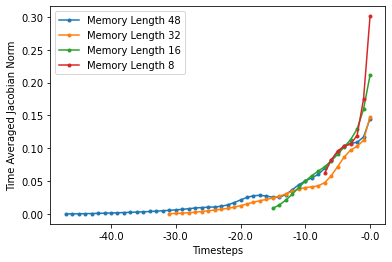

In [85]:
x = torch.arange(timesteps_jac)/lt
print(x[:].shape)
plt.figure()
for i in [3,2,1,0]:#range(len(models)):
    
    n = torch.mean(torch.norm(grad_xn_xseq[i].cpu(), dim = -1),dim = 1)
    print(i, n.shape)
    inv_n = torch.flip(n,[1])
    inv_x = torch.flip(x,[0])
    plt.plot( inv_n[0,:], ".-", label = f"Memory Length {models[i].seq_len - 1}")
plt.legend()

plt.gca().invert_xaxis()
plt.gca().set_xticklabels([-tick for tick in plt.gca().get_xticks()])

plt.ylabel("Time Averaged Jacobian Norm")
plt.xlabel("Timesteps")

Eigenvalue Study

[ 0.9997971 +0.j          0.9986772 +0.j          0.99761623+0.00171436j
  0.99761623-0.00171436j  0.9947138 +0.j          0.99098104+0.j
  0.986174  +0.00241163j  0.986174  -0.00241163j  0.8903398 +0.j
  0.7594211 +0.j         -0.02861356+0.4501454j  -0.02861356-0.4501454j
 -0.16278388+0.j         -0.5732941 +0.28671628j -0.5732941 -0.28671628j
 -0.63127303+0.j        ]


Text(0, 0.5, '$Img(\\lambda)$')

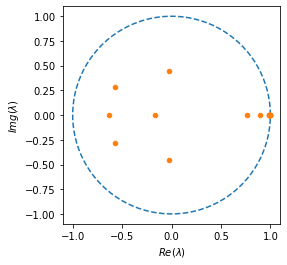

In [23]:
#eigenvalue study
plt.figure()
plt.gca().set_aspect('equal')

angles = np.linspace(0, 2 * np.pi, 100)
unit_circle = np.exp(1j * angles)
plt.plot(unit_circle.real, unit_circle.imag, '--', label = "Unit Circle")

for i in [3]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    w, v = np.linalg.eig(mat)

    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    print(w)
    # plt.matshow(mat)
    # plt.colorbar()
    # plt.figure()
    plt.plot(np.real(w), np.imag(w), ".", markersize = 9, label = f"Num Observables {models[i].num_obs}")

plt.xlabel(r"$Re(\lambda)$")
plt.ylabel(r"$Img(\lambda)$")
# plt.legend()

array([-6.4373533e-05+0.0000000e+00j, -4.1820804e-04+0.0000000e+00j,
       -1.0346977e-02+5.3045107e-03j, -1.0346977e-02-5.3045107e-03j,
       -2.2239581e-02+2.0869549e-03j, -2.2239581e-02-2.0869549e-03j,
       -2.2658700e-02+1.9498048e-02j, -2.2658700e-02-1.9498048e-02j,
       -1.6742165e-01+2.4893414e-02j, -1.6742165e-01-2.4893414e-02j,
       -5.4264646e+00+6.5507488e+00j, -5.4264646e+00-6.5507488e+00j,
       -1.3220926e+01+1.2566371e+01j, -3.3214509e+00+1.2566371e+01j,
       -2.1959112e+00+1.1211950e+01j, -2.1959112e+00-1.1211950e+01j],
      dtype=complex64)

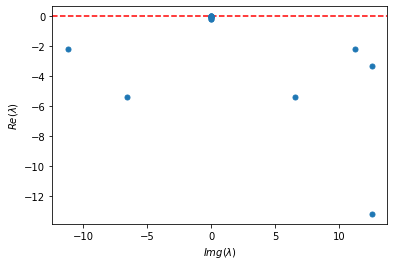

In [24]:
plt.figure()

plt.axhline(0, color='red', linestyle='--')

# plt.text(0.17, 0.075, 'x = 0.17', color='green')
for i in [0]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    w, v = np.linalg.eig(mat)

    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]

    lamb = (np.log(w)/0.25)
    plt.plot(np.imag(lamb[:]),np.real(lamb[:]),".", markersize = 10, label = f"Num Observables {models[i].num_obs}")

plt.ylabel(r"$Re(\lambda)$")
plt.xlabel(r"$Img(\lambda)$")

# plt.ylim(-0.1,0.1)
# plt.xlim(-1,1)
# plt.legend()
lamb

[[ 7.2499681e-01  1.4884576e-01 -1.2733236e-01 -2.7376369e-01
  -3.2968681e-02  3.4397909e-01  7.4303217e-02 -6.4007185e-02
  -2.8003680e-02  4.5552391e-01]
 [-4.1287165e-02  8.9542377e-01 -2.4513003e-01 -2.1997395e-01
   1.4958316e-01  1.8928923e-01  1.2582669e-01 -4.2336941e-02
   1.2620163e-02  9.2439890e-02]
 [-1.6348667e-01 -6.8173550e-02  4.6878937e-01 -2.8100458e-01
   3.3403617e-01  3.9833698e-01  1.7248723e-01 -5.6339115e-02
  -2.0049682e-01  1.3633522e-01]
 [ 1.1954852e-02 -9.3211658e-02 -7.9273991e-02  7.6126403e-01
   4.0217763e-01 -1.2370355e-01 -1.2330229e-01  9.5390588e-02
   1.6550983e-01 -2.2263603e-01]
 [-8.3087079e-02  5.8326207e-02 -1.5179381e-01 -2.1578149e-01
   7.9724658e-01  3.2704532e-01  1.4149848e-01 -9.2268653e-02
   2.6865043e-02  4.0279177e-01]
 [ 2.2350013e-01  2.6183233e-02  4.1888669e-01  3.3964604e-01
  -3.4302193e-01  6.1842823e-01 -1.5412647e-01  4.7644664e-02
   1.2186485e-01 -1.8504688e-01]
 [-5.2130032e-02 -2.5214890e-02 -1.8673681e-01 -1.9055639e

<Figure size 432x288 with 0 Axes>

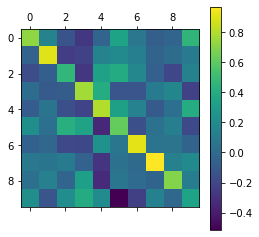

In [24]:
#Matrix
plt.figure()


for i in [3]:
    
    mat = models[i].model.koopman.getKoopmanMatrix()
    mat = mat.detach().cpu().numpy()
    plt.matshow(mat)
    plt.colorbar()
    # plt.figure()
    # plt.plot(np.real(w), np.imag(w), ".", label = f"Num Observables {models[i].num_obs}")
    print(mat)
# plt.legend()